# Importation des libraries de bases 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly_express as px
import plotly.graph_objects as go

In [2]:
import os
os.getcwd()

'/home/arnaud/Bureau/Master 2 Data Science /Spark/Data'

# Importation des jeux de données

In [3]:
train_data = pd.read_csv('./train.csv',sep=',')
test_data = pd.read_csv('./test.csv',sep=',')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyse descriptive

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Sibsp**: Donne l'information si la personne etait en famillle (Frère et soeur ou époux)


**Parch**: Nombre de parents

In [6]:
train_data.set_index(keys='PassengerId',inplace=True)

In [7]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Valeurs manquantes présentes dans le jeu de donnée

In [8]:
train_data.isna().sum()/train_data.shape[0]

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

## Cast des colonnes dans leurs types prédéfinis

In [9]:
train_data['Pclass'] = train_data['Pclass'].astype('object')

In [10]:
train_data.dtypes

Survived      int64
Pclass       object
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [11]:
train_data['SibSp'].drop_duplicates()

PassengerId
1      1
3      0
8      3
17     4
39     2
60     5
160    8
Name: SibSp, dtype: int64

In [12]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [13]:
train_data['Parch'].drop_duplicates()

PassengerId
1      0
8      1
9      2
14     5
87     3
168    4
679    6
Name: Parch, dtype: int64

## Traitement des valeurs manquantes

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN,strategy='median')

In [15]:
train_data['Age'] = imputer.fit_transform(train_data[['Age']])

In [16]:
# Imputation des valeurs catégrielles

imputer = SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

train_data[['Cabin','Embarked']] = imputer.fit_transform(train_data[['Cabin','Embarked']])

In [17]:
train_data.dropna(inplace=True)

In [18]:
train_data.shape

(891, 11)

## Baseline Modèle

In [19]:
target = train_data['Survived']
train = train_data[['SibSp','Parch','Fare']]

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SibSp   891 non-null    int64  
 1   Parch   891 non-null    int64  
 2   Fare    891 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 27.8 KB


In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=.2,random_state=123)

In [22]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

In [23]:
logit.fit(X_train,y_train)

LogisticRegression()

In [24]:
logit.score(X_train,y_train)

0.6629213483146067

In [25]:
logit.score(X_test,y_test)

0.7039106145251397

In [26]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(logit,X_train,y_train,cv=5).mean()

print(score)

0.6615778587609573


## Etudes des variables

In [27]:
survived = train_data[train_data.Survived==1]
dead = train_data[train_data.Survived==0]

Populating the interactive namespace from numpy and matplotlib


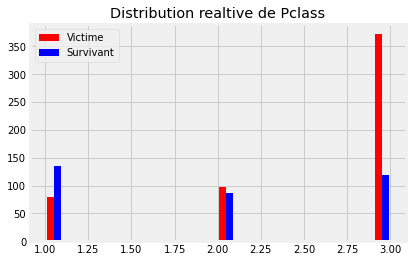

In [28]:
import matplotlib.pyplot as plt

from matplotlib import style
style.use("fivethirtyeight")
%matplotlib inline
%pylab inline

def plot_hist(feature,bins=20):
    x1 = np.array(dead[feature].dropna())
    x2 = np.array(survived[feature].dropna())
    plt.hist([x1,x2],label=["Victime","Survivant"],bins=bins,color=['r','b'])
    plt.legend(loc='upper left')
    plt.title('Distribution realtive de %s' %feature)
    plt.show()
    
plot_hist('Pclass')

In [29]:
# Evaluation de modèle à partir des feature en input 
from sklearn.metrics import classification_report
def evaluation(clf,features,target='Survived',data=train_data):
    
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import classification_report
    
    categorial_feature = [f for f in features if data[f].dtype == 'O']
    data = data[features]
    if len(categorial_feature)!=0:
        data = pd.get_dummies(data,columns = categorial_feature)
        
    X = data
    y = train_data['Survived']
    # Train test split
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=123)
    
    # fit
    clf.fit(X_train,y_train)
    score = clf.score(X_test,y_test)
    
    # Evaluation du modèle en cross validation
    
    valuate = cross_val_score(clf,X,y,cv=5)
    
    valuate = valuate.mean(),valuate.std()
    dico = {"Accuracy":score,"Accuracy_CV":valuate[0],"Accuracy_CV Std":valuate[1]}
    print(classification_report(y_test,clf.predict(X_test)))
    for k,v in dico.items():
        print('{}:   {:.2f}'.format(k,v))

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()

In [39]:
evaluation(knn,features=['SibSp','Parch','Fare','Pclass'])

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       114
           1       0.58      0.63      0.60        65

    accuracy                           0.70       179
   macro avg       0.68      0.68      0.68       179
weighted avg       0.71      0.70      0.70       179

Accuracy:   0.70
Accuracy_CV:   0.66
Accuracy_CV Std:   0.05


In [32]:
train_data['Function'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

In [33]:
train_data['Function'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(random_state=123)
parameters = {
    'n_estimators':[100,150,200,250,300],
    'max_depth': np.arange(6,16,2),
    'min_samples_split':np.arange(10,30,5),
    'min_samples_leaf':np.arange(5,20,5)
}


model = GridSearchCV(rf,parameters,verbose=1,cv=5,n_jobs=-1)

In [43]:
%%time
evaluation(model,features=['SibSp','Parch','Fare','Pclass','Sex','Age','Function','Cabin','Embarked'])

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.2min finished


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.1min finished


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  2.1min finished


              precision    recall  f1-score   support

           0       0.82      0.94      0.88       114
           1       0.86      0.65      0.74        65

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.84      0.83      0.83       179

Accuracy:   0.83
Accuracy_CV:   0.81
Accuracy_CV Std:   0.03
CPU times: user 31.6 s, sys: 1.37 s, total: 32.9 s
Wall time: 12min 41s


In [45]:
model.best_params_

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 100}

In [50]:
rf = RandomForestClassifier(n_estimators=100,max_depth=12,min_samples_split=20,min_samples_leaf=5,n_jobs=-1)

rf.fit(X,train_data.Survived)

RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=20,
                       n_jobs=-1)

In [51]:
rf.score(X,train_data.Survived)

0.8260381593714927

In [54]:
score_cv = cross_val_score(rf,X,train_data.Survived,cv=5,verbose=1,n_jobs=-1)

print("Accuracy en cv: {}  (+/-) {}".format(score_cv.mean(),score_cv.std()))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy en cv: 0.8103257799259307  (+/-) 0.0247130847333126


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.0s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


In [48]:
X = pd.get_dummies(train_data.drop(columns=['Name','Ticket','Survived']))

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Cabin_A10,...,Function_ Master,Function_ Miss,Function_ Mlle,Function_ Mme,Function_ Mr,Function_ Mrs,Function_ Ms,Function_ Rev,Function_ Sir,Function_ the Countess
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,38.0,1,0,71.2833,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,26.0,0,0,7.9250,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35.0,1,0,53.1000,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,35.0,0,0,8.0500,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
